# 2011MC04 ||  Avinash Singh ||  MA502  ||  Quiz  ||  Home Assignment

<img src="Q1.9.March.png">

## Import Libraries

In [122]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from tabulate import tabulate

## Given Function and it's gradients

<img src="Q1.9m2.png">

In [123]:
#Function :
func =   lambda x1,x2 :100*((x2-x1**2)**2)+(1-x1**2)
#Gradient w.r.to x1
funcx1 = lambda x1,x2 : 400*x1*(x1**2-x2)+2*x1-2
#Gradient w.r.to x2
funcx2 = lambda x1,x2 : -200*(x1**2)+200*x2

## Visualizing the Given Function 

#### Surface Plot

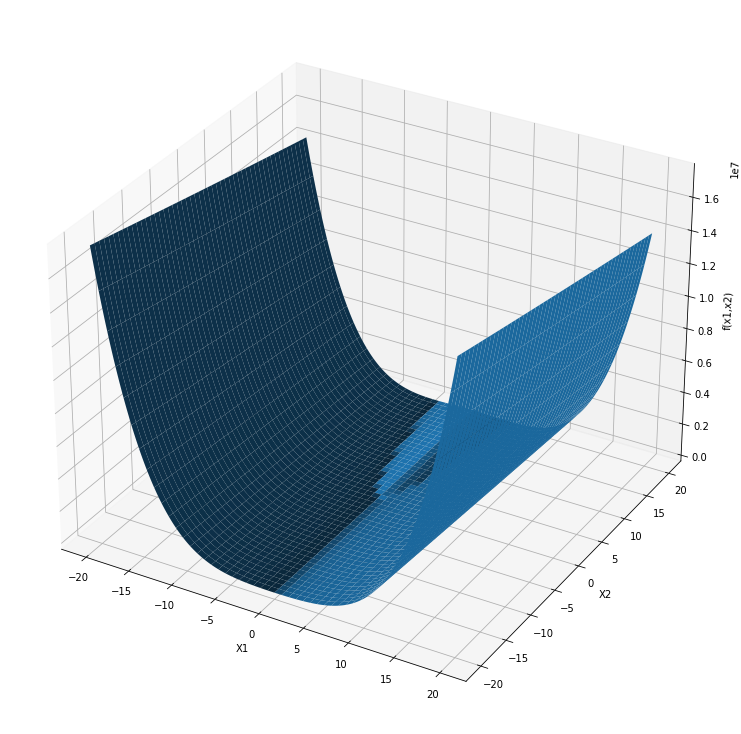

In [124]:
# x1 and x2 created for visualizing the function
x1 = np.arange(-20,20,0.1)
x2 = np.arange(-20,20,0.1)

X1,X2 = np.meshgrid(x1,x2)
f = func(X1,X2)
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(X1,X2,f)
plt.xlabel('X1')
plt.ylabel('X2')
ax.set_zlabel('f(x1,x2)')
plt.gcf().set_size_inches(15, 10)
plt.show()

#### Contour Plot

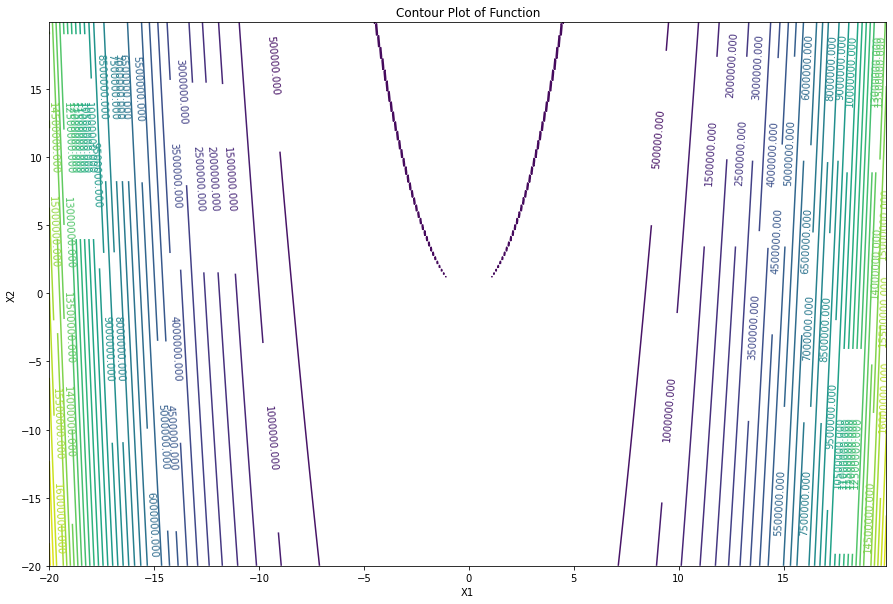

In [125]:
fig,ax2 = plt.subplots()
cs = ax2.contour(X1,X2,f,40)
ax2.clabel(cs,inline=1,fontsize=10)
ax2.set_xlabel("X1")
ax2.set_ylabel("X2")
ax2.set_title('Contour Plot of Function')
plt.gcf().set_size_inches(15, 10)

## Defining the Golden Section Function

#### Purpose: To Find the Best Learning Rate

In [126]:
phi=0.618
def golden(f,x_low, x_up, tol, max_n):
    
    iteration_count = 0
    while (x_up-x_low)>tol and iteration_count<max_n:
        x_n1 = x_up - phi*(x_up - x_low)
        x_n2 = x_low + phi*(x_up - x_low)
        
        if f(x_n1) <= f(x_n2):
            x_up = x_n2
            x_n2 = x_n1
            x_n1 = x_up - phi*(x_up - x_low)
        else:
            x_low = x_n1
            x_n1 = x_n2
            x_n2  = x_low + phi*(x_up - x_low)
        iteration_count = iteration_count + 1
    return (x_n1 + x_n2)/2.0

#### Steepest Descent Function

In [127]:
def steepest_descent(f,fx1,fx2,Initial_Points,max_iterations,epsilon):
    results = []
    x1,x2 = Initial_Points
    diff = 10**10
    for i in range(max_iterations):
        # Stopping condition)-> if differences between two consecutive iteration is smaller than epsilon 
        if diff>epsilon:
            
            # direction of movement,s1 and s2 are negative of the derivatives
            # s1 and s2 are the directions of the next step. 
            s1 = -fx1(x1,x2)
            s2 = -fx2(x1,x2)
            
            # fd is the new function which goes through the current point and has the direction
            fd = lambda d: f(x1 + d*s1, x2 + d*s2)
            
            # alpha is the step length. It decides how big the step will be in the direction of s1 and s2. 
            alpha = golden(fd,0,100000,0.0001,100)
            x1_new = x1 + alpha*s1
            x2_new = x2 + alpha*s2
            diff = abs(f(x1,x2)-f(x1_new,x2_new))
            # values are stored as rounded for visualization purposes.
            results.append([i,round(x1,5),round(x2,5),round(s1,5),round(s2,5),round(f(x1,x2),10),round(alpha,5),diff])
            x1 = x1_new
            x2 = x2_new
        else:
            break
    return results

#### Calling the Function Steepest Descent 

In [128]:
initial = [2,2]
sdr = steepest_descent(func,funcx1,funcx2,initial,10000,0.0001)

## Required Table

In [129]:
import pandas as pd
df = pd.DataFrame(sdr, columns = ['k','x1','x2','s1','s2','f(x1,x2)','alpha','diff = fnext-fcurrent'])
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows', None)
df2=df
df2=df2.drop(['s1','s2','alpha','diff = fnext-fcurrent'],axis=1)
df2

,k,x1,x2,"f(x1,x2)"
0,0,2.00000,2.00000,397.000000
1,1,-1.70956,2.92623,-1.921279
2,2,1.46454,2.14019,-1.142678
3,3,-1.72002,2.95304,-1.955520
4,4,1.83819,3.37355,-2.376030
5,5,-2.02946,4.11308,-3.115546
6,6,2.13510,4.55314,-3.555615
7,7,-2.29294,5.25278,-4.255277
8,8,2.38061,5.66172,-4.664189
9,9,-2.51875,6.33870,-5.341189


## Printing values after every 50 iterations

In [130]:
df2.iloc[1::50, :]

,k,x1,x2,"f(x1,x2)"
1,1,-1.70956,2.92623,-1.921279
51,51,-5.25264,27.58987,-26.590165
101,101,-6.99260,48.88591,-47.885350
151,151,7.57048,57.30600,-56.308368


#### Visualization of the Output

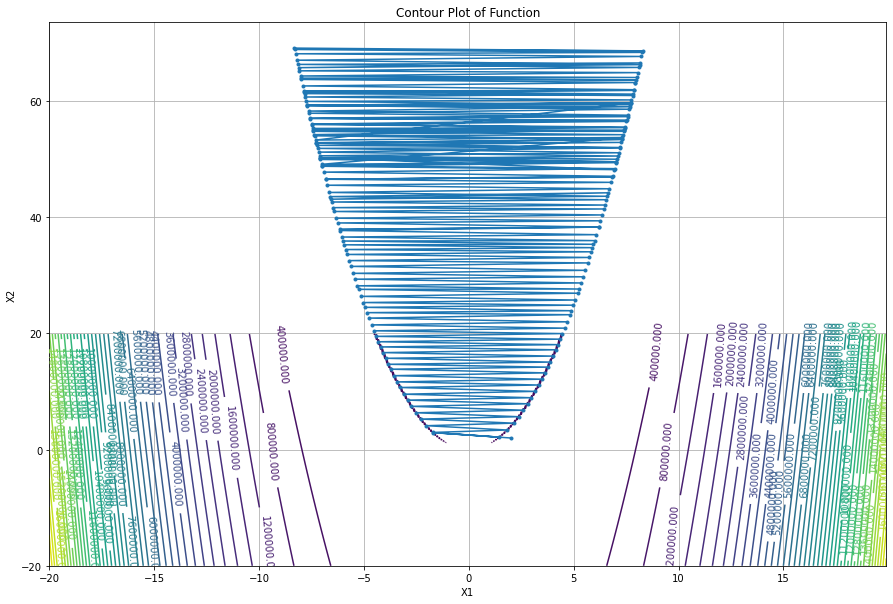

In [131]:
sdr = np.array(sdr)
fig,ax2 = plt.subplots()
cs = ax2.contour(X1,X2,f,50)
ax2.clabel(cs,inline=1,fontsize=10)
ax2.set_xlabel("X1")
ax2.set_ylabel("X2")
ax2.set_title('Contour Plot of Function')
plt.gcf().set_size_inches(15, 10)
plt.plot(sdr[:,1],sdr[:,2],".-")
plt.grid()

## Conclusion:

#### Point of Minimum:

In [132]:
df2.iloc[-1::]

,k,x1,x2,"f(x1,x2)"
187,187,-8.31316,69.10864,-68.108637


In [133]:
# k->Iteration Number
